In [34]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

df=pd.read_csv('201506-citibike-tripdata.csv')
print df.columns

Populating the interactive namespace from numpy and matplotlib
Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


`%matplotlib` prevents importing * from pylab and numpy


In [35]:
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [73]:
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

df['hourStarted'] = pd.to_datetime(df['starttime']).dt.hour

In [94]:
df['dayRider'] = 2015-df['birth year'][(df['hourStarted'] >= 6) & (df['hourStarted'] <= 18)]
df['nightRider'] = 2015-df['birth year'][(df['hourStarted'] > 18) | (df['hourStarted'] <= 6)]


count    198091.000000
mean         36.794786
std          10.987311
min          16.000000
25%          28.000000
50%          34.000000
75%          44.000000
max         130.000000
Name: nightRider, dtype: float64

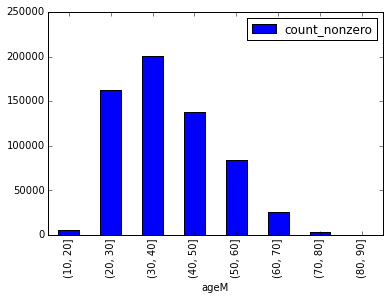

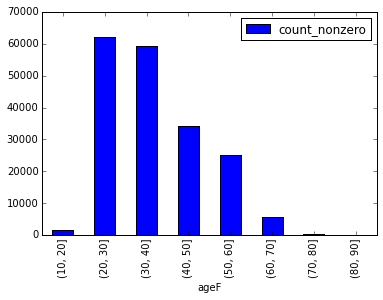

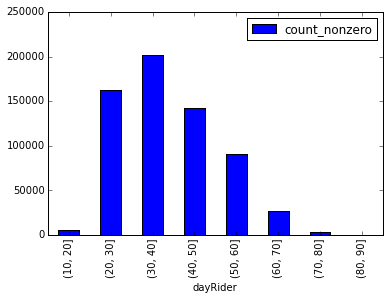

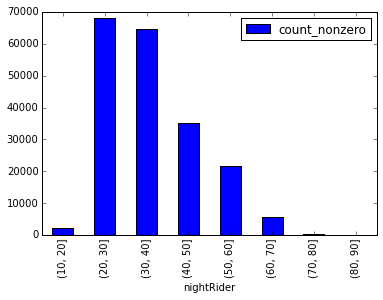

In [95]:


bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')
df.dayRider.groupby(pd.cut(df.dayRider, bins)).agg([count_nonzero]).plot(kind='bar')
df.nightRider.groupby(pd.cut(df.nightRider, bins)).agg([count_nonzero]).plot(kind='bar')

#df.dayRider.groupby(pd.cut(df.dayRider, bins)).agg([count_nonzero]).plot(kind='bar')
#df.dr.groupby(pd.cut(df.dr, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
dayRider               
(10, 20]              0
(20, 30]              0
(30, 40]              0
(40, 50]              0
(50, 60]              0
(60, 70]              0
(70, 80]              0
(80, 90]              0
            count_nonzero
nightRider               
(10, 20]                0
(20, 30]                0
(30, 40]                0
(40, 50]                0
(50, 60]                0
(60, 70]                0
(70, 80]                0
(80, 90]                0


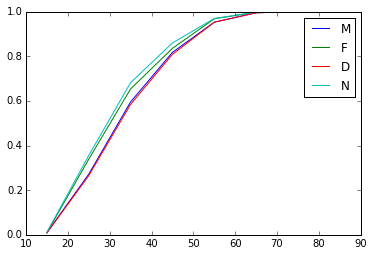

In [96]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()
csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()
csD=df.dayRider.groupby(pd.cut(df.dayRider, bins)).agg([count_nonzero]).cumsum()
csN=df.nightRider.groupby(pd.cut(df.nightRider, bins)).agg([count_nonzero]).cumsum()

print np.abs(csD / csD.max()-csD / csD.max())
print np.abs(csN / csN.max()-csN / csN.max())


pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, csD / csD.max(), label = "D")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "N")
pl.legend()

In [40]:
import scipy.stats

In [97]:
ks_MF=scipy.stats.ks_2samp(df.ageM, df.ageF)
ks_DN=scipy.stats.ks_2samp(df.dayRider, df.nightRider)

In [99]:
print ks_MF
print ks_DN

(0.45996202796586128, 0.0)
(0.46251510009891428, 0.0)


In [104]:
pearson_MF = scipy.stats.pearsonr(df.ageM, df.ageF)
pearson_DN = scipy.stats.pearsonr(df.dayRider, df.nightRider)
spearman_MF = scipy.stats.spearmanr(df.ageM, df.ageF)
spearman_DN = scipy.stats.spearmanr(df.dayRider, df.nightRider)

In [105]:
print pearson_MF
print pearson_DN
print spearman_MF
print spearman_DN

(nan, 1.0)
(nan, 1.0)
(-0.40105722503130287, 0.0)
(-0.33218641303530039, 0.0)
